In [1]:
import tensorflow as tf
print(tf.__version__)
import keras 
print(keras.__version__)

2.4.0
2.4.3


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [4]:
from keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [5]:
image_size=[224,224]
train_path='/content/drive/My Drive/MalariaDataset/Train'
test_path='/content/drive/My Drive/MalariaDataset/Test'

In [ ]:
vgg19=VGG19(input_shape=image_size+[3],weights="imagenet",include_top=False) 

80142336/80134624 [==============================] - 1s 0us/step


In [ ]:
vgg19.summary() # first and last layers cut

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
#dont train existing layers we use the same weights of the trained model.. just work on our last layer according to our problem
for layer in vgg19.layers:
  layer.trainable=False

In [ ]:
folders=glob('/content/drive/My Drive/MalariaDataset/Train/*')

In [ ]:
folders

['/content/drive/My Drive/MalariaDataset/Train/Uninfected',
 '/content/drive/My Drive/MalariaDataset/Train/Parasite']

In [ ]:
#flatten the last layer we can add more layers 
x=Flatten()(vgg19.output)


In [ ]:
prediction=Dense(len(folders),activation="softmax")(x) # taking 2 nodes in the end hence using softmax..sigmoid when taking one node

# create a model object
model=Model(inputs=vgg19.input,outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model.compile(
    loss="categorical_crossentropy",
    optimizer='adam',
    metrics=['accuracy']
)

# using categorical_crossentropy bcos i have 2 nodes in the end..for 1 node binary_crossentropy works

In [ ]:
#only scaling the images 
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)


In [ ]:
train_generator = train_datagen.flow_from_directory(train_path,target_size = (224,224),batch_size =32, 
                                                    class_mode = "categorical")

Found 416 images belonging to 2 classes.


In [ ]:
test_generator=test_datagen.flow_from_directory(test_path,target_size = (224,224),batch_size =32, 
                                                    class_mode = "categorical")

Found 134 images belonging to 2 classes.


In [ ]:
r=model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=30,
    steps_per_epoch=len(train_generator),
    validation_steps=len(test_generator)

)

Epoch 1/30
13/13 [==============================] - 203s 16s/step - loss: 1.7380 - accuracy: 0.4957 - val_loss: 1.1586 - val_accuracy: 0.6791
Epoch 2/30
13/13 [==============================] - 6s 486ms/step - loss: 0.9826 - accuracy: 0.5674 - val_loss: 0.9772 - val_accuracy: 0.5075
Epoch 3/30
13/13 [==============================] - 6s 470ms/step - loss: 0.5032 - accuracy: 0.7560 - val_loss: 0.6590 - val_accuracy: 0.6642
Epoch 4/30
13/13 [==============================] - 6s 470ms/step - loss: 0.3531 - accuracy: 0.8302 - val_loss: 0.4855 - val_accuracy: 0.7612
Epoch 5/30
13/13 [==============================] - 6s 477ms/step - loss: 0.3123 - accuracy: 0.8841 - val_loss: 0.4213 - val_accuracy: 0.8284
Epoch 6/30
13/13 [==============================] - 6s 473ms/step - loss: 0.3300 - accuracy: 0.8556 - val_loss: 0.4109 - val_accuracy: 0.7164
Epoch 7/30
13/13 [==============================] - 6s 492ms/step - loss: 0.3671 - accuracy: 0.8150 - val_loss: 0.3970 - val_accuracy: 0.8134
Epoch 

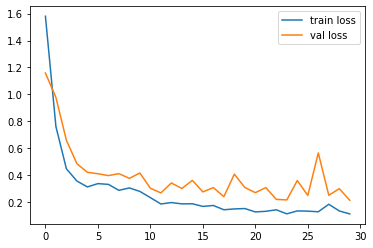

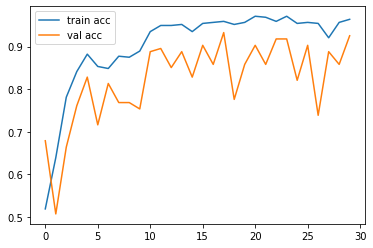

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model

model.save('/content/drive/My Drive/Malariamodel_vgg19.h5')

In [ ]:
y_pred = model.predict(test_generator)

In [ ]:
y_pred

array([[9.99999762e-01, 2.02517484e-07],
       [9.99935865e-01, 6.41475490e-05],
       [6.87976480e-02, 9.31202352e-01],
       [8.89572978e-01, 1.10427044e-01],
       [1.04078077e-01, 8.95921886e-01],
       [8.82354796e-01, 1.17645234e-01],
       [9.41311494e-02, 9.05868828e-01],
       [9.94078159e-01, 5.92183275e-03],
       [5.19666016e-01, 4.80333954e-01],
       [9.99805510e-01, 1.94454580e-04],
       [1.81209370e-01, 8.18790615e-01],
       [3.68734032e-01, 6.31265938e-01],
       [1.84236482e-01, 8.15763533e-01],
       [1.55811325e-01, 8.44188631e-01],
       [9.96690750e-01, 3.30925663e-03],
       [1.30810082e-01, 8.69189978e-01],
       [7.65622854e-01, 2.34377176e-01],
       [1.36581272e-01, 8.63418758e-01],
       [1.71551332e-01, 8.28448713e-01],
       [1.48593947e-01, 8.51406097e-01],
       [8.43395650e-01, 1.56604305e-01],
       [2.02664793e-01, 7.97335267e-01],
       [9.72033560e-01, 2.79664248e-02],
       [4.11770791e-01, 5.88229179e-01],
       [9.931972

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1])

In [6]:
# 0 means affected(parasitic) and 1 means unaffected

In [7]:
from keras.models import load_model
from keras.preprocessing import image

In [8]:
model=load_model('/content/drive/My Drive/Malariamodel_vgg19.h5')

In [13]:
img= image.load_img('/content/drive/My Drive/MalariaDataset/Test/Uninfected/2.png',target_size=(224,224))

In [14]:
x=image.img_to_array(img)

In [15]:
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [16]:
x=x/255

In [19]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [20]:
model.predict(img_data)

array([[0.04255962, 0.9574404 ]], dtype=float32)

In [21]:
a=np.argmax(model.predict(img_data),axis=1)

In [22]:
if (a==1):
  print("uninfected")
else:
  print("infected")

uninfected
